# Visualization

- **Black box**
  - 내부 작업의 어떤 이해없이 입력과 결과의 측면으로 볼 수 있는 시스템
  - 입력에 대한 출력만 있을 뿐 내부 작업이 명확하지 않은 것
  - 인공 신경망에서의 은닉 층을 분석하는 것이 어려움
- **Weighted Visualization**
  - 합성곱 층은 여러 개의 필터를 사용해 이미지의 특징을 학습
  - 필터에는 커널(kernel)이라는 가중치가 존재하고 가중치는 이미지의 2차원 영역에 적용되어 어떠한 특징을 뚜렷하게 만드는 역할을 수행
- **Feature Map Visualization**
  - 합성곱층을 입력 이미지와 필터를 연산해서 얻은 결과
  - 합성곱층의 입력과 출력을 확인할 수 있다면, 특성 맵에 대한 시각화도 가능할 것
- Functional API 
  - 객체를 함수처럼 호출해 값을 반환하도록 할 수 있음
  - **`keras.Model(inputs, outputs)`**
  - Model 클래스에 입력과 출력을 지정해 모델을 완성
  - 최신의 딥러닝 모델은 입력이 2개 이상이거나 출력이 2개 이상인 복잡한 모델을 Functional API로 구현

### 1. Load a model
- Using `keras.models.load_model()`
- `best-cnn-model.h5`

In [ ]:
from tensorflow import keras
model = keras.models.load_model("best-cnn-model.h5")
model.layers

### 2. The first layer **mean** and **std** of the weighted array
- Using `.numpy()`
  - `.mean()`
  - `.std()`
  - 합성곱 층의 가중치 정보는 층의 weights 속성에 Tensor 객체로 저장
  - Tensor 객체를 ndarray 형식으로 변환
- `layers[0]`: 계층 위치
- `weights[0]`: 가중치
- `weights[1]`: 절편

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
print(conv.weights)

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 1.96579993e-01,  3.00833315e-01, -8.10605362e-02,
          -6.52519763e-02, -2.33154938e-01, -1.59487531e-01,
           9.99830663e-02,  1.73494861e-01, -1.23639703e-01,
          -3.13445747e-01,  1.06973521e-01,  1.48146570e-01,
          -7.96341896e-02, -3.05463355e-02,  3.81662976e-04,
          -3.42415459e-02, -3.38846266e-01,  1.69217274e-01,
           5.71671166e-02, -2.47436166e-01,  1.24241315e-01,
           2.65505344e-01,  4.89876792e-02, -1.14358895e-01,
          -3.50715399e-01,  1.07617915e-01,  2.55738199e-01,
          -4.15108874e-02,  2.03738928e-01,  5.77293225e-02,
          -3.20400566e-01, -1.27120852e+00]],

        [[-1.36562899e-01, -3.43119532e-01,  6.70614094e-02,
           2.40577638e-01, -2.16994569e-01,  9.79503058e-03,
          -2.10470632e-01, -2.00331300e-01, -2.11722553e-01,
          -2.04585582e-01,  8.83049071e-02, -2.41925821e-01,
           2.42960066e-01

In [ ]:
conv_weights = conv.weights[0].numpy() 
print(conv_weights)
print(conv_weights[0].mean(), conv_weights[1].std())

[[[[ 1.96579993e-01  3.00833315e-01 -8.10605362e-02 -6.52519763e-02
    -2.33154938e-01 -1.59487531e-01  9.99830663e-02  1.73494861e-01
    -1.23639703e-01 -3.13445747e-01  1.06973521e-01  1.48146570e-01
    -7.96341896e-02 -3.05463355e-02  3.81662976e-04 -3.42415459e-02
    -3.38846266e-01  1.69217274e-01  5.71671166e-02 -2.47436166e-01
     1.24241315e-01  2.65505344e-01  4.89876792e-02 -1.14358895e-01
    -3.50715399e-01  1.07617915e-01  2.55738199e-01 -4.15108874e-02
     2.03738928e-01  5.77293225e-02 -3.20400566e-01 -1.27120852e+00]]

  [[-1.36562899e-01 -3.43119532e-01  6.70614094e-02  2.40577638e-01
    -2.16994569e-01  9.79503058e-03 -2.10470632e-01 -2.00331300e-01
    -2.11722553e-01 -2.04585582e-01  8.83049071e-02 -2.41925821e-01
     2.42960066e-01  5.31815886e-02  2.07537189e-02  2.45610222e-01
    -2.85538267e-02  1.25917390e-01  2.12430671e-01 -4.81963724e-01
     2.39870623e-01 -2.96759810e-02 -1.31752372e-01  1.66661322e-01
    -8.46685469e-02 -1.57122657e-01  1.864725

### 3. Using histogram
- 1차원 배열을 입력으로 사용해 히스토그램을 시각화
- Using `matplotlib.pyplot` 
- Using `.hist()`

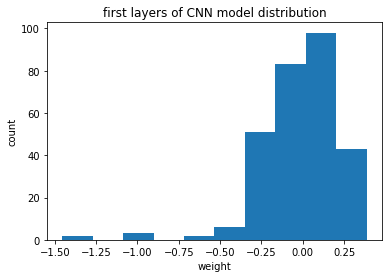

In [ ]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1))
plt.xlabel("weight")
plt.ylabel("count")
plt.title("first layers of CNN model distribution")
plt.show()

### 4. Weighted Visualization
- Using `.imshow()`
- 출력 범위를 정해 픽셀의 강도를 비교할 수 있음
- **`vmin=(default)None`**: 최솟값
- **`vmax=(default)None`**: 최댓값


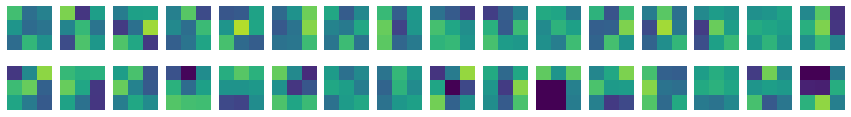

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16+j],vmin=-0.5, vmax=0.5)
    axs[i, j].axis("off")
plt.show()

### 5. First convolutional layer weight distribution of Non-trained model
1. Sequential 객체를 먼저 생성
  - Using `keras.Sequential()`
2. Conv2D layer 추가
  - Using `keras.layers.Conv2D()`
 

In [ ]:
non_trained_model = keras.Sequential()
non_trained_model.add(keras.layers.Conv2D(
    32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1)
    )
)

#Checkout first layer size
non_trained_conv = non_trained_model.layers[0]
print(non_trained_conv.weights[0].shape)

(3, 3, 1, 32)


> 추가한 Conv2D 레이어 스케일은 (3, 3, 1, 32)

### 6. Using histogram
- 1차원 배열을 입력으로 사용해 히스토그램을 시각화
- Using `matplotlib.pyplot` 
- Using `.hist()`

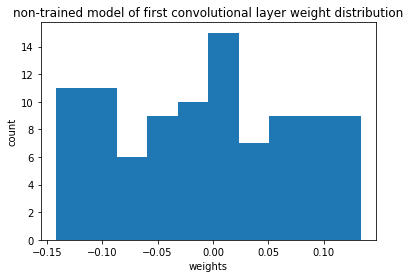

In [ ]:
non_trained_weights = non_trained_conv.weights[0].numpy()

plt.hist(non_trained_weights[0].reshape(-1, 1))
plt.xlabel("weights")
plt.ylabel("count")
plt.title("non-trained model of first convolutional layer weight distribution")
plt.show()

In [ ]:
print(non_trained_weights.mean(), non_trained_weights.std())

-0.0028652162 0.08029948


> 가중치 분포가 [-0.15, 0.15]영역의 균등 분포를 따르며, 평균은 0에 가깝고 표준 편차가 매우 작음

> **이에 대한 결과는 달라질 수 있음**

### 7. Non-trained weighted Visualization
- Using `.imshow()`
- 출력 범위를 정해 픽셀의 강도를 비교할 수 있음
- **`vmin=(default)None`**: 최솟값
- **`vmax=(default)None`**: 최댓값


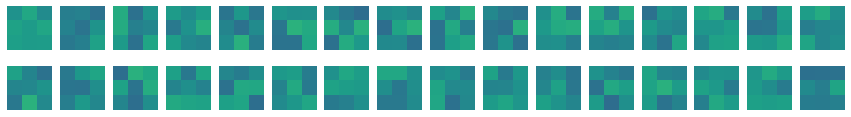

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(non_trained_weights[:, :, 0, i*16+j],vmin=-0.5, vmax=0.5)
    axs[i, j].axis("off")
plt.show()

### 8. Feature Map Visualization
1. 첫번째 Conv2D 특성 맵을 시각화
2. Model 객체의 입력과 첫번째 Conv2D 특성 맵으로부터 새로운 모델 생성
  - **`model.input`**
  - **`model.layers[0].output`**


In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


4422102/4422102 [==============================] - 0s 0us/step


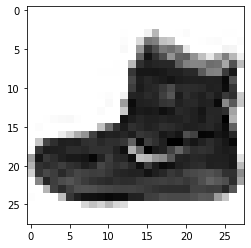

In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

1/1 [==============================] - 7s 7s/step


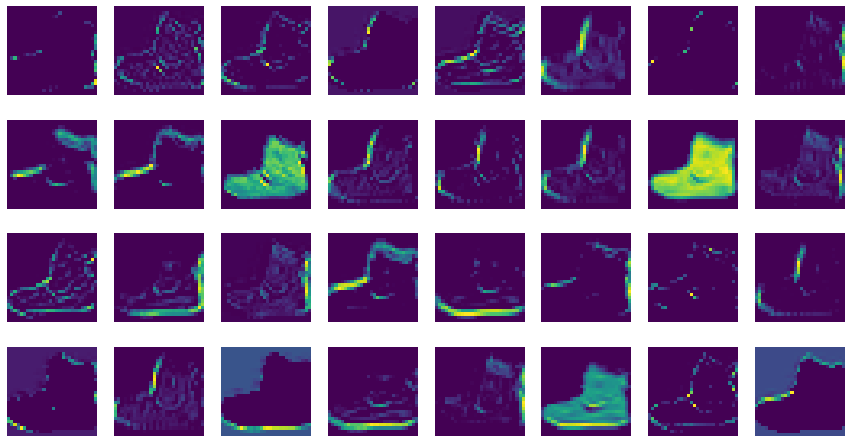

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i, j].axis("off")
plt.show()

> feature_maps를 이미지로 출력하는데, 이미지가 32개의 필터로 인해 강하게 활성화 된 부분을 보여주고 있음

### 9. Secondary Feature Map Visualization
1. 두번째 Conv2D 특성 맵을 시각화
2. Model 객체의 입력과 두번째 Conv2D 특성 맵으로부터 새로운 모델 생성
  - **`model.input`**
  - **`model.layers[2].output`**
- **인덱스 상 layers[1]이 Conv2D layer가 아닌 이유**
  - Model 객체의 구조에서 layers[1]은 Pooling2D layer이기 때문

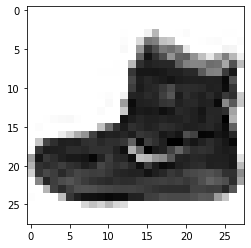

In [ ]:
conv_acti2 = keras.Model(model.input, model.layers[2].output)

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

print()

1/1 [==============================] - 0s 17ms/step


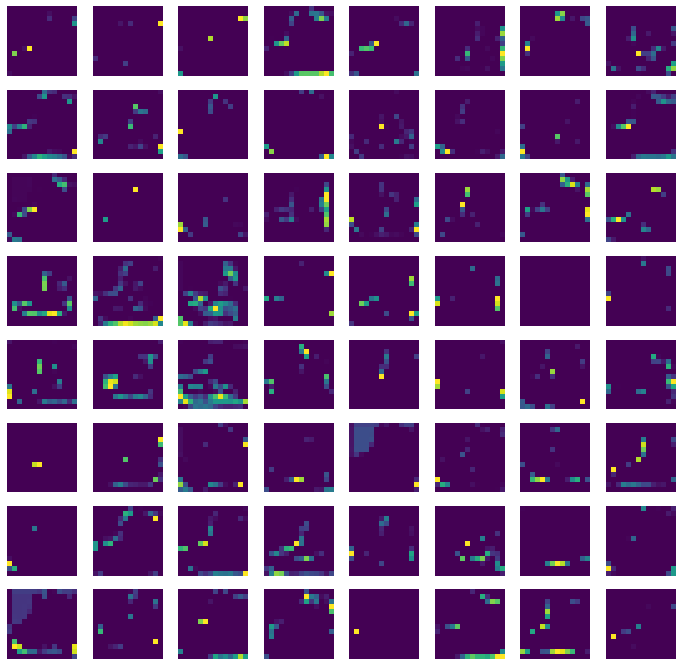

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti2.predict(inputs)

fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i, j].axis("off")
plt.show()

> MaxPooling2D 통과 후 특성 맵이 64개의 필터로 인해 강하게 활성화 된 부분을 보여주고 있음

> 첫번째 레이어보다 시작적으로 어떤 부위를 감지하고 있는지 판단하기 어려운데, 이는 합성곱 층을 많이 쌓을수록 심해짐

> 따라서 선두의 합성곱 층은 이미지의 시각정보를 감지하고, 뒤의 합성곱 층은 그에 대한 추상적인 정보를 학습한다고 볼 수 있음